# Example Single Backtest

Single example backtest

In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import sys
sys.path.append('..')

In [2]:
# backtest engine and strategies
from backtester import Orchestrator
from algorithms.TradeLogic1 import TradingLogic as TradingLogic1

In [3]:
# for testing purposes, we will use data from quantum computing companies. For these, we have data going 
# back to august 4th, at minute by minute resolution
dataset = pd.read_csv('../data/qtm_data.csv', index_col = 'Datetime')

# Algorithm 1

Outputs of the orchestrator are: 
- index 0: log_df, all of the trades which are made, shown via all of the active orders. 
- index 1:4 Variety of things related to pnl 

In [4]:
outs1 = Orchestrator(
    TradingLogic1,
    start_time="2025-08-05 14:30:00+00:00", 
    dataset = dataset,
    alpha = 0.6,  
    pcs_removed = 2,
    slippage = 5,
    unwind_rate=10, 
    sensitivity=0.01, 
    min_len=10, 
    ).RunOrchestrator() 

print('Pnl from run:',outs1[1].iloc[-1])

Pnl from run: 2.1039262737637756


In [5]:
# make a df which allows us to offset some of the position vs time plots 
diff = max(0, len(outs1[1]) - len(outs1[0]))
offsets = pd.DataFrame(
    0,
    index=pd.RangeIndex(diff),
    columns=outs1[0].columns
)
log_df1 = pd.concat([offsets, outs1[0]], axis=0)

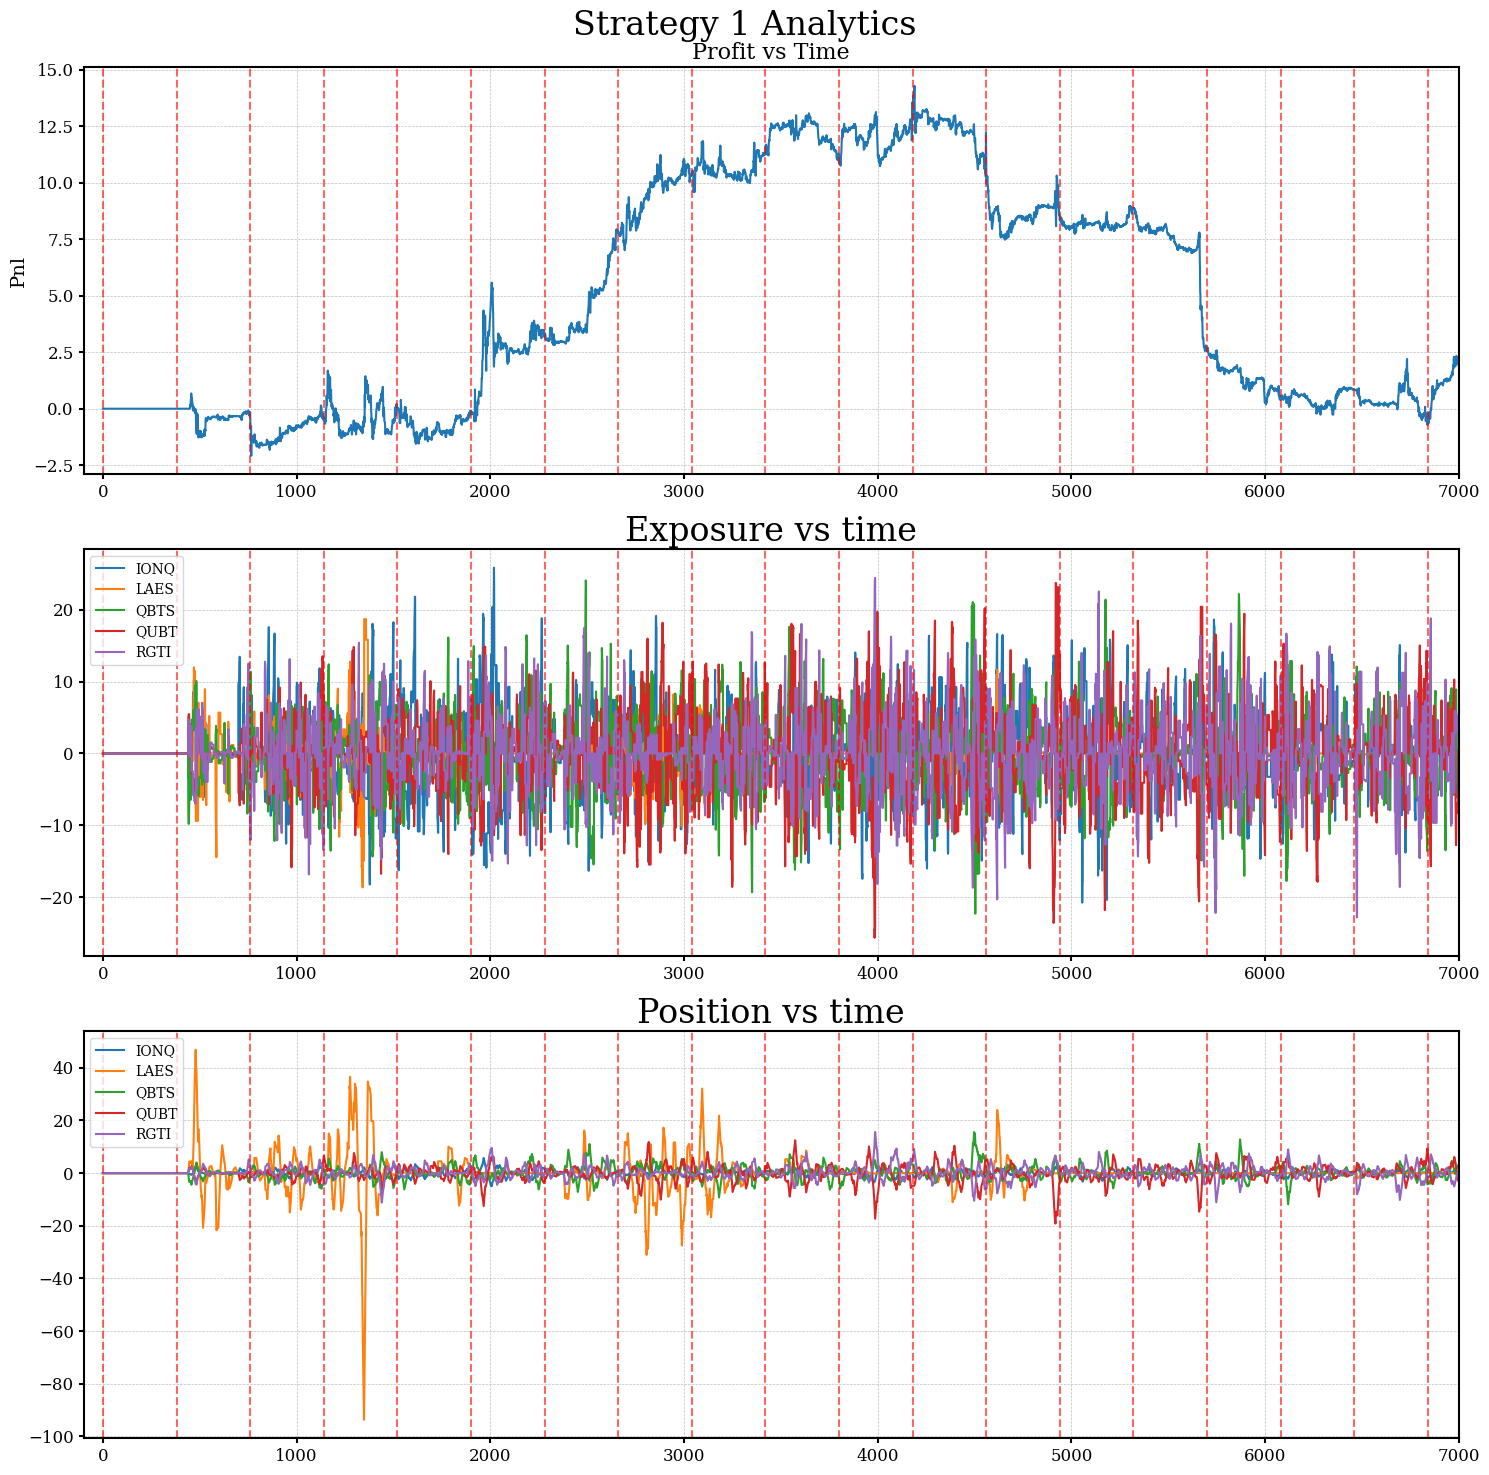

In [6]:
daybreaks = [380 * i for i in range(21)]
fig, axes = plt.subplots(3, figsize=(15,15))
fig.suptitle('Strategy 1 Analytics', fontsize = 24)
axes[0].plot(range(0, len(outs1[1])), outs1[1])
axes[0].set_title('Profit vs Time')
axes[0].set_ylabel('Pnl')

axes[1].plot(range(0, len(log_df1)), log_df1 * dataset.iloc[-1], label = log_df1.columns)
axes[1].set_title('Exposure vs time', fontsize = 24)
axes[1].legend(loc = 'upper left')

positions1 = log_df1.cumsum()
axes[2].plot(range(0, len(positions1)), positions1, label = log_df1.columns)
axes[2].set_title('Position vs time', fontsize = 24)
axes[2].legend(loc = 'upper left')

axes = axes.flatten()
for ax in axes:
    for dbreak in daybreaks:
        ax.axvline(dbreak, color = 'red', linestyle = '--', alpha = 0.6)
        ax.set_xlim((-100, 7000))
fig.tight_layout()
plt.show()